# Characters Segmentation

In [51]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

white = 255
black = 0 


In [2]:
#Source: https://stackoverflow.com/a/42314798

def plotimage(img, title=None, figsize=None):
    h = img.shape[0]
    w = img.shape[1]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])    
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()


In [3]:
def gray_to_bw(gray, thresh):
    '''
    Returns a new image
    '''
    bw = gray.copy()
    bw[bw<thresh]=0
    bw[bw>=thresh]=255
    return bw    


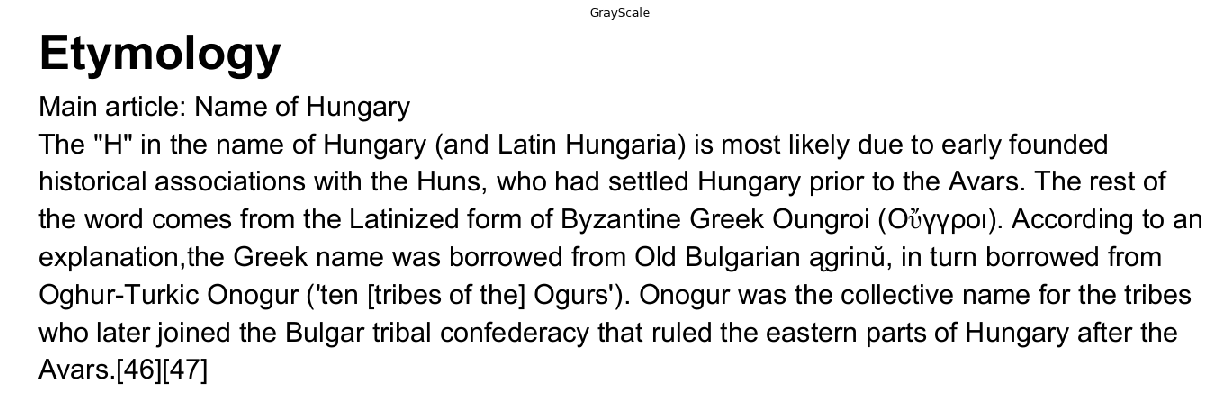

In [4]:
img = cv2.imread('images/04.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plotimage(gray, 'GrayScale')

## Convert to Black and White

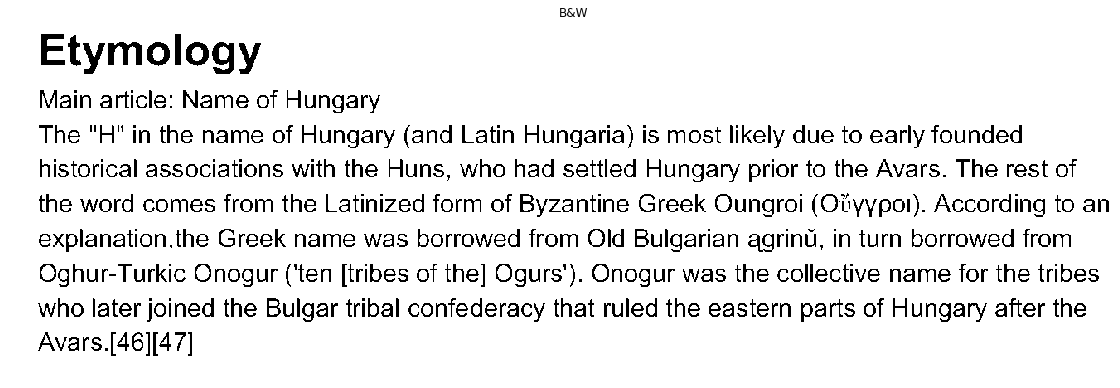

In [5]:
thresh = 100
bw=gray_to_bw(gray, thresh)
plotimage(bw, 'B&W', figsize=(15,15))


### Vertical Segmentation

In [11]:
def vert_seg(bw):

    lines = []

    width = bw.shape[1]
    height = bw.shape[0]

    i = 0
    start = 0
    while True:
        if black not in bw[i,:] or i==height-1: 
            if i!=start:
                lines.append({'start': start,'end': i-1})            
            start=i+1

        if i==height-1:
            break
        i+=1    
        
    return lines

In [61]:
def draw_vert_lines(vert, lines):
    for line in lines:
        start = line['start']
        end = line['end']
        cv2.line(vert, (0,start), (width,start), (0,0,255))
        cv2.line(vert, (0,end), (width,end), (255,0,0))

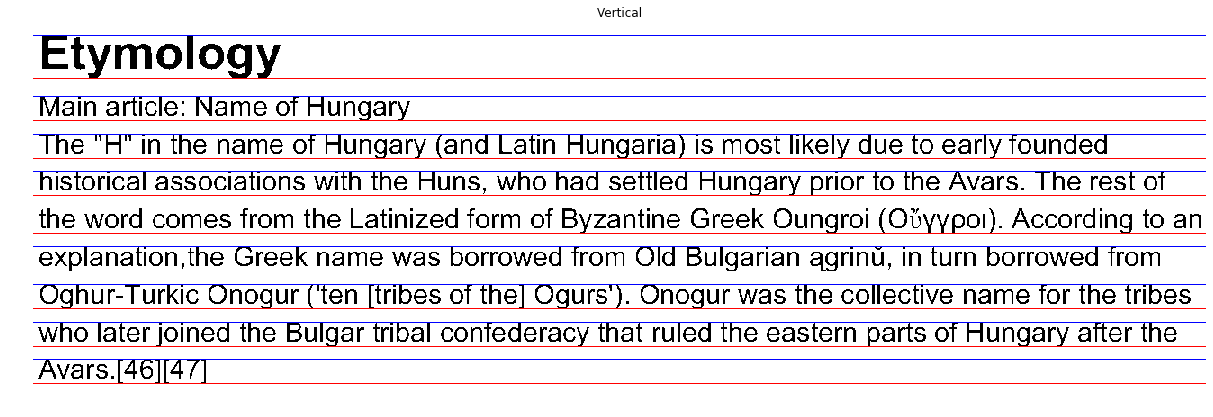

In [62]:
lines = vert_seg(bw)
vert = bw.copy()
vert=cv2.cvtColor(vert, cv2.COLOR_GRAY2RGB)
draw_vert_lines(vert, lines)
plotimage(vert, 'Vertical')

### Horizontal Segmentation

In [52]:
def hor_seg(img):
    j = 0
    start = 0
    chars = []
    while True:
        if black not in img[:,j] or j==width-1: 
            if j!=start:
                chars.append({'start':start,'end':j-1})            
            start=j+1

        if j==width-1:
            break
        j+=1
        
    return chars

In [63]:
def draw_hor_lines(img, chars):
    for char in chars:
        char_start = char['start']
        char_end = char['end']
        cv2.line(hor, (char_start,start), (char_start,end), (0,0,255))  
        cv2.line(hor, (char_end,start), (char_end,end), (255,0,0)) 

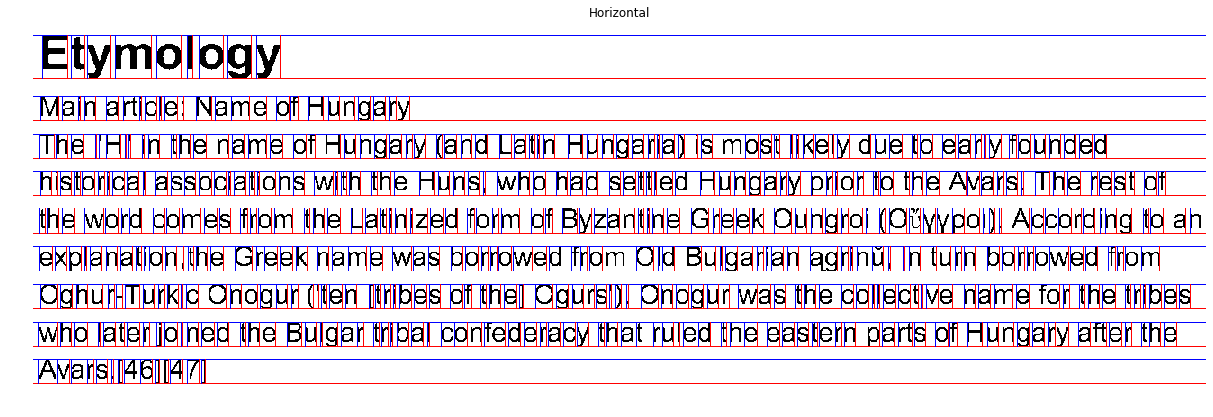

In [65]:
i = 0
start = 0

for line in lines:
    img = bw[line['start']:line['end'],:]
    line['chars'] = hor_seg(img)

hor = vert.copy()
for line in lines:
    start = line['start']
    end = line['end']
    draw_hor_lines(hor[start:end,:], line['chars'])

plotimage(hor, 'Horizontal')

## Plotting Some Random chars

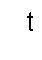

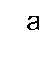

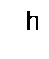

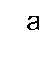

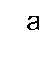

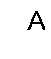

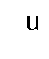

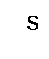

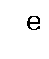

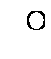

In [49]:
for k in range(10):
    i = random.randint(0,len(lines)-1)
    line = lines[i]
    j = random.randint(0,len(line['chars'])-1)
    char = line['chars'][j]
    
    img = bw[line['start']:line['end'],char['start']:char['end']]
    
    plotimage(img,'')

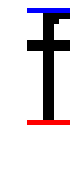

[{'start': 0, 'end': 21}]


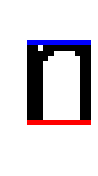

[{'start': 6, 'end': 21}]


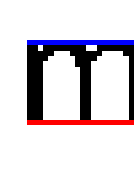

[{'start': 6, 'end': 21}]


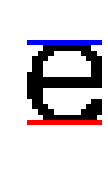

[{'start': 6, 'end': 21}]


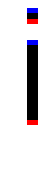

[{'start': 0, 'end': 2}, {'start': 6, 'end': 21}]


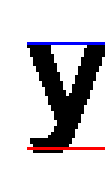

[{'start': 11, 'end': 46}]


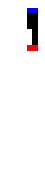

[{'start': 0, 'end': 7}]


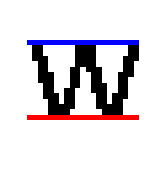

[{'start': 6, 'end': 20}]


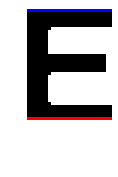

[{'start': 0, 'end': 36}]


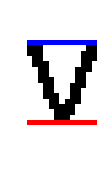

[{'start': 6, 'end': 21}]


In [83]:
for k in range(10):
    i = random.randint(0,len(lines)-1)
    line = lines[i]
    j = random.randint(0,len(line['chars'])-1)
    char = line['chars'][j]
    
    img = bw[line['start']:line['end'],char['start']:char['end']]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    
    
    img_lines = vert_seg(img)
    draw_vert_lines(img, img_lines)
    plotimage(img,'', (2,2))
    print(img_lines)


## TODO: Do above code for all chars